# AMADEUS CHALLENGE

In [2]:
#name of files
!ls -l ../

total 7755000
drwxrwxr-x 4 dsc dsc       4096 may 28 07:48 amadeus_challenge
-rw-rw-r-- 1 dsc dsc 4244874509 abr  2  2018 bookings.csv
-rw-rw-r-- 1 dsc dsc 3696229366 abr  2  2018 searches.csv


In [277]:
#import libraries
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

#Plot inside jupyter
%matplotlib inline

#Show all columns
pd.options.display.max_columns = None


In [3]:
#Exploring

## Exercise 1: Count the number of lines in Python for each line

In [37]:
#Read files with only one column to reduce the size of the file
bookings_reader=pd.read_csv("../bookings.csv", delimiter="^", iterator=True, chunksize = 10000, usecols=[0])
searches_reader=pd.read_csv("../searches.csv", delimiter="^", iterator=True, chunksize = 10000, usecols=[0])

In [5]:
def file_lines (file):
    """Returns the length of a given file that has been read with the itereator"""
    length = 0
    for b_chunk in file:
        length += b_chunk.shape[0]
    return length

bookings_len = file_lines(bookings_reader)
searches_len = file_lines(searches_reader)

print("Total lines of 'bookings.csv': {}".format(bookings_len))
print("Total lines of 'searches.csv': {}".format(searches_len))

*************

KeyboardInterrupt: 

In [ ]:
#pending.... Check for insosisnte date
#print(bookings_chunk["arr_port"].isnull().sum())

In [ ]:
#Clean file
#Bookings_first_chunk = 

## Exercise 2: Top 10 arrivals

In [30]:
#Read file including only "arr_port" and "pax" to calculate top 10 airports
chunks_booking=pd.read_csv("../bookings.csv", usecols=["arr_port","pax"],delimiter="^", iterator=True, chunksize = 10000 )#names=[arr_port,pax]

In [31]:
#Read all the chuncks aggregate data by airport ("arr_port") adding the bookings passangers ("pax")
pieces = [x.groupby('arr_port').sum() for x in chunks_booking]

In [129]:
#Concatenate all the pieces
agg = pd.concat(pieces).groupby(level=0).sum()

In [131]:
#Reset index, strip the names, and assign back the index
agg.reset_index(inplace=True)
agg["arr_port"]=agg["arr_port"].str.strip()
agg.set_index("arr_port", inplace=True)
#print top 10 airports per number of passangers
agg.iloc[:,0].sort_values(ascending=False).head(10)

arr_port
LHR    88809.0
MCO    70930.0
LAX    70530.0
LAS    69630.0
JFK    66270.0
CDG    64490.0
BKK    59460.0
MIA    58150.0
SFO    58000.0
DXB    55590.0
Name: pax, dtype: float64

In [146]:
#Importing airport names from GeoBases selecting only columns iata_code, airport name and country name
url="https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv"
columns=["iata_code","airport_name","country_name"]
iata_names = pd.read_csv(url, delimiter ="^",usecols=[0,1,4],header=None, names=columns)

#strip iata_codes and set as index
iata_names["iata_code"]=iata_names["iata_code"].str.strip()
iata_names.set_index("iata_code", inplace=True)

In [147]:
#merge files on idex to include names of country and airprt
aux=agg.join(iata_names, how="left")

#print top 10 airports per number of passangers including airport name and country
aux.sort_values(by="pax",ascending=False).head(10)

,pax,airport_name,country_name
arr_port,,,
LHR,88809.0,London Heathrow Airport,United Kingdom
MCO,70930.0,Orlando International Airport,United States
LAX,70530.0,Los Angeles International Airport,United States
LAS,69630.0,McCarran International Airport,United States
JFK,66270.0,John F Kennedy International Airport,United States
CDG,64490.0,Paris - Charles-de-Gaulle,France
BKK,59460.0,Suvarnabhumi,Thailand
MIA,58150.0,Miami International Airport,United States
SFO,58000.0,San Francisco International Airport,United States


## THIRD EXERCISE: plot the monthly number of searches for flights arriving at Malaga, Madrid or Barcelona.

Plot one curve for Malaga, another for Madrid and another for Barcelona in the same fig.

In [177]:
#Explore searches file to select only relevant columns
searches_reader=pd.read_csv("../searches.csv", delimiter="^", iterator=True, chunksize = 10000)
searches_df=searches_reader.get_chunk()

In [178]:
searches_df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [240]:
#Select Relevant columns
relevant_columns=["Date","Destination"]

#Function to parse dates and times 
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

#Import only relevant columns, merging dates and parsing it to datetime
searches_reader=pd.read_csv("../searches.csv", 
                            delimiter="^", 
                            iterator=True, 
                            chunksize = 10000, 
                            usecols=relevant_columns,
                            parse_dates={'datetime': ['Date']},
                            date_parser=dateparse)

#Read first chunk
searches_chunk=searches_reader.get_chunk()

#Explore the type of the columns
searches_chunk.info()
searches_chunk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
datetime       10000 non-null datetime64[ns]
Destination    10000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 156.3+ KB


,datetime,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [255]:
searches_reader=pd.read_csv("../searches.csv", 
                            delimiter="^", 
                            iterator=True, 
                            chunksize = 10000, 
                            usecols=relevant_columns)

In [286]:
#Filtering Madrid (MAD), Barcelona(BCN) & Malaga(AGP)
pieces = []

for chunk in searches_reader:
    #Clean destination file
    chunk["Destination"] = chunk["Destination"].str.strip()
    query= (chunk["Destination"]=="MAD") | (chunk["Destination"]=="BCN") | (chunk["Destination"]=="AGP")
    pieces.append(chunk[query])

#Concat all pieces
searches_esp = pd.concat(pieces)

#Convert dates to datetime
searches_esp["Date"] = pd.to_datetime(searches_esp["Date"])

ValueError: No objects to concatenate

In [294]:
to_plot = searches_esp[searches_esp["Destination"]=="MAD"].resample("M", on="Date").count()
to_plot["Date"]

Date
2013-01-31    24258
2013-02-28    22800
2013-03-31    24681
2013-04-30    25251
2013-05-31    26334
2013-06-30    22800
2013-07-31    22971
2013-08-31    21831
2013-09-30    21147
2013-10-31    22294
2013-11-30    20272
2013-12-31    14504
Freq: M, Name: Date, dtype: int64

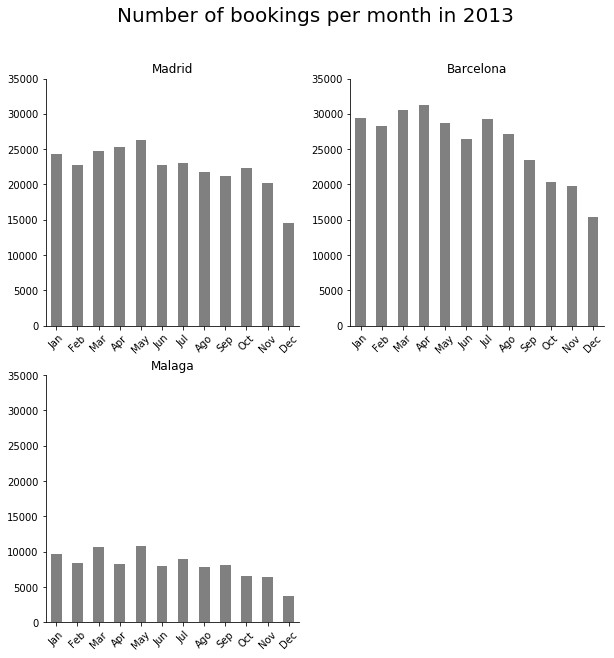

In [325]:
#Aggregate and plot

airports = {"MAD":"Madrid","BCN":"Barcelona","AGP":"Malaga"}
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]

#Create fiture
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Number of bookings per month in 2013', fontsize=20)
#Plot
for i,air in enumerate(airports):
    ax = fig.add_subplot(2,2,i+1)
    to_plot = searches_esp[searches_esp["Destination"]==air].resample("M", on="Date").count()
    to_plot["Date"].plot(kind="bar",ax=ax, title=airports[air], rot=45, color="grey", legend=None)
    ax.set_xticklabels(months)
    ax.xaxis.set_label_text("")
    ax.set_ylim(0,35000)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        

    

## BONUS EXERCISE: match searches with bookings

For every search in the searches file, find out whether ended up in a booking or not.
Generate a csv with the searches with an additional column containing 1 if the search ended up in a booking or 0 in any other case.

origin and destination in the search should match with the booking

In [158]:
#Exploring searches files
searches_reader=pd.read_csv("../searches.csv", delimiter="^", iterator=True, chunksize = 10000)
bookings_reader=pd.read_csv("../bookings.csv", delimiter="^", iterator=True, chunksize = 10000)

#Read first chunk
searches_df=searches_reader.get_chunk()
bookings_df=bookings_reader.get_chunk()


In [161]:
searches_df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


Hypothesis: SEARCHS FILE contains multiple flights in one line, however BOOKINGS FILE seems to only contain one flight (with transfers)

In [ ]:
columns_to_keep_searches=["Date",
                          "Time",
                          "Country",
                          "Origin",
                          "RoundTrip",
                          "Destination",
                          "Seg1Departure",
                          "Seg1Arrival",
                          "Seg1Date",
                         
                         ]

In [165]:
bookings_df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
